In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

from tensorflow import keras
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
ls data/image/


folder1/ folder2/ folder3/ folder4/ folder5/


In [3]:
PATH = '/'
PATH_IMG = 'data/image/ISIC_2019_Training_Input/'

In [4]:
df = pd.read_csv('ISIC_2019_Training_GroundTruth.csv')
print(df.shape)
df.head()

(25331, 10)


,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_1 = df.iloc[:,:1]
df_2 = df.iloc[:,1:].astype('int')

df = pd.merge(df_1,df_2,left_index=True, right_index=True)
df.head()


,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0,1,0,0,0,0,0,0,0
1,ISIC_0000001,0,1,0,0,0,0,0,0,0
2,ISIC_0000002,1,0,0,0,0,0,0,0,0
3,ISIC_0000003,0,1,0,0,0,0,0,0,0
4,ISIC_0000004,1,0,0,0,0,0,0,0,0


In [6]:
for column in df:
    df[column] = df[column].astype(str).replace("1", column)
    
df.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0,NV,0,0,0,0,0,0,0
1,ISIC_0000001,0,NV,0,0,0,0,0,0,0
2,ISIC_0000002,MEL,0,0,0,0,0,0,0,0
3,ISIC_0000003,0,NV,0,0,0,0,0,0,0
4,ISIC_0000004,MEL,0,0,0,0,0,0,0,0


In [7]:
df.replace('0', np.nan, inplace=True)
df['target'] = df[df.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

df = pd.merge(df.iloc[:,:1],df.iloc[:,-1:],left_index=True, right_index=True)
df.head()

,image,target
0,ISIC_0000000,NV
1,ISIC_0000001,NV
2,ISIC_0000002,MEL
3,ISIC_0000003,NV
4,ISIC_0000004,MEL


In [8]:
df1 = pd.read_csv('ISIC_2019_Training_Metadata.csv')
print(df1.shape)
df1.head()

(25331, 5)


,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


In [9]:
for i in df1.columns[1:]:
    print(i)
    print(df1[i].unique())
    print('\n')
    print('/'*60)

age_approx
[55. 30. 60. 80. 25. 35. 50. 45. 70. 40. 65. 20. 15. 85. nan  5. 10. 75.
  0.]


////////////////////////////////////////////////////////////
anatom_site_general
['anterior torso' 'upper extremity' 'posterior torso' 'lower extremity'
 nan 'lateral torso' 'head/neck' 'palms/soles' 'oral/genital']


////////////////////////////////////////////////////////////
lesion_id
[nan 'MSK4_0011169' 'MSK4_0011170' ... 'BCN_0002147' 'BCN_0001946'
 'BCN_0001014']


////////////////////////////////////////////////////////////
sex
['female' 'male' nan]


////////////////////////////////////////////////////////////


In [10]:
for i in df1.columns[1:]:
    print('There is {} missing in column {} which is {:.0%} missing value'.format(df1[i].isna().sum(),i,df1[i].isna().sum()/len(df1)))
    print('\n')
    print('/'*60)

There is 437 missing in column age_approx which is 2% missing value


////////////////////////////////////////////////////////////
There is 2631 missing in column anatom_site_general which is 10% missing value


////////////////////////////////////////////////////////////
There is 2084 missing in column lesion_id which is 8% missing value


////////////////////////////////////////////////////////////
There is 384 missing in column sex which is 2% missing value


////////////////////////////////////////////////////////////


In [11]:
# df1[df1.anatom_site_general.isna()]
df['na'] = df1[df1.columns[1:]].isnull().apply(lambda x: all(x), axis=1) 
df.query('na == True')

,image,target,na
76,ISIC_0000080_downsampled,NV,True
77,ISIC_0000081_downsampled,NV,True
78,ISIC_0000082_downsampled,NV,True
79,ISIC_0000085_downsampled,NV,True
80,ISIC_0000086_downsampled,NV,True
...,...,...,...
477,ISIC_0000552,MEL,True
478,ISIC_0000554,MEL,True
479,ISIC_0000555,MEL,True
480,ISIC_0000556,NV,True


In [12]:
df1['na'] = df1[df1.columns[1:]].isnull().apply(lambda x: all(x), axis=1) 
df1.query('na == True')

,image,age_approx,anatom_site_general,lesion_id,sex,na
76,ISIC_0000080_downsampled,NaN,NaN,NaN,NaN,True
77,ISIC_0000081_downsampled,NaN,NaN,NaN,NaN,True
78,ISIC_0000082_downsampled,NaN,NaN,NaN,NaN,True
79,ISIC_0000085_downsampled,NaN,NaN,NaN,NaN,True
80,ISIC_0000086_downsampled,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...
477,ISIC_0000552,NaN,NaN,NaN,NaN,True
478,ISIC_0000554,NaN,NaN,NaN,NaN,True
479,ISIC_0000555,NaN,NaN,NaN,NaN,True
480,ISIC_0000556,NaN,NaN,NaN,NaN,True


# remove the records that all columns value are missing (151)

In [13]:
df1.drop(df1.query('na == True').index, inplace = True)
df1.shape

(25180, 6)

In [14]:
df.drop(df.query('na == True').index, inplace = True)
df.shape

(25180, 3)

# drop records if gender is missing

In [19]:
df.drop(df1[df1.sex.isna()].index, inplace =True)
df.shape

(24947, 3)

In [20]:
df1.drop(df1[df1.sex.isna()].index, inplace =True)
df1.shape

(24947, 6)

# drop if anatom_site_general is missing


In [21]:
df.drop(df1[df1.anatom_site_general.isna()].index, inplace =True)
df.shape

(22531, 3)

In [22]:
df1.drop(df1[df1.anatom_site_general.isna()].index, inplace =True)
df1.shape

(22531, 6)

# drop if age_approx is missing


In [24]:
df.drop(df1[df1.age_approx.isna()].index, inplace =True)
df.shape

(22480, 3)

In [25]:
df1.drop(df1[df1.age_approx.isna()].index, inplace =True)
df1.shape

(22480, 6)

In [23]:
for i in df1.columns[1:]:
    print('There is {} missing in column {} which is {:.0%} missing value'.format(df1[i].isna().sum(),i,df1[i].isna().sum()/len(df1)))
    print('\n')
    print('/'*60)

There is 51 missing in column age_approx which is 0% missing value


////////////////////////////////////////////////////////////
There is 0 missing in column anatom_site_general which is 0% missing value


////////////////////////////////////////////////////////////
There is 1215 missing in column lesion_id which is 5% missing value


////////////////////////////////////////////////////////////
There is 0 missing in column sex which is 0% missing value


////////////////////////////////////////////////////////////
There is 0 missing in column na which is 0% missing value


////////////////////////////////////////////////////////////


In [26]:
def get_images(diagnosis):
    fig, ax = plt.subplots(1,5,figsize=(25, 25))
    for i in range(5):
        image_index = random.choice(df.loc[df[diagnosis]==1.0]['image'].reset_index(drop=True))
        image_path = f'{PATH_IMG}{image_index}.jpg'
        img = cv2.imread(image_path)[...,[2,1,0]]
        ax[i].set_title(f'image {str(diagnosis)}')
        ax[i].imshow(img)
    plt.show()
    

KeyError: 0

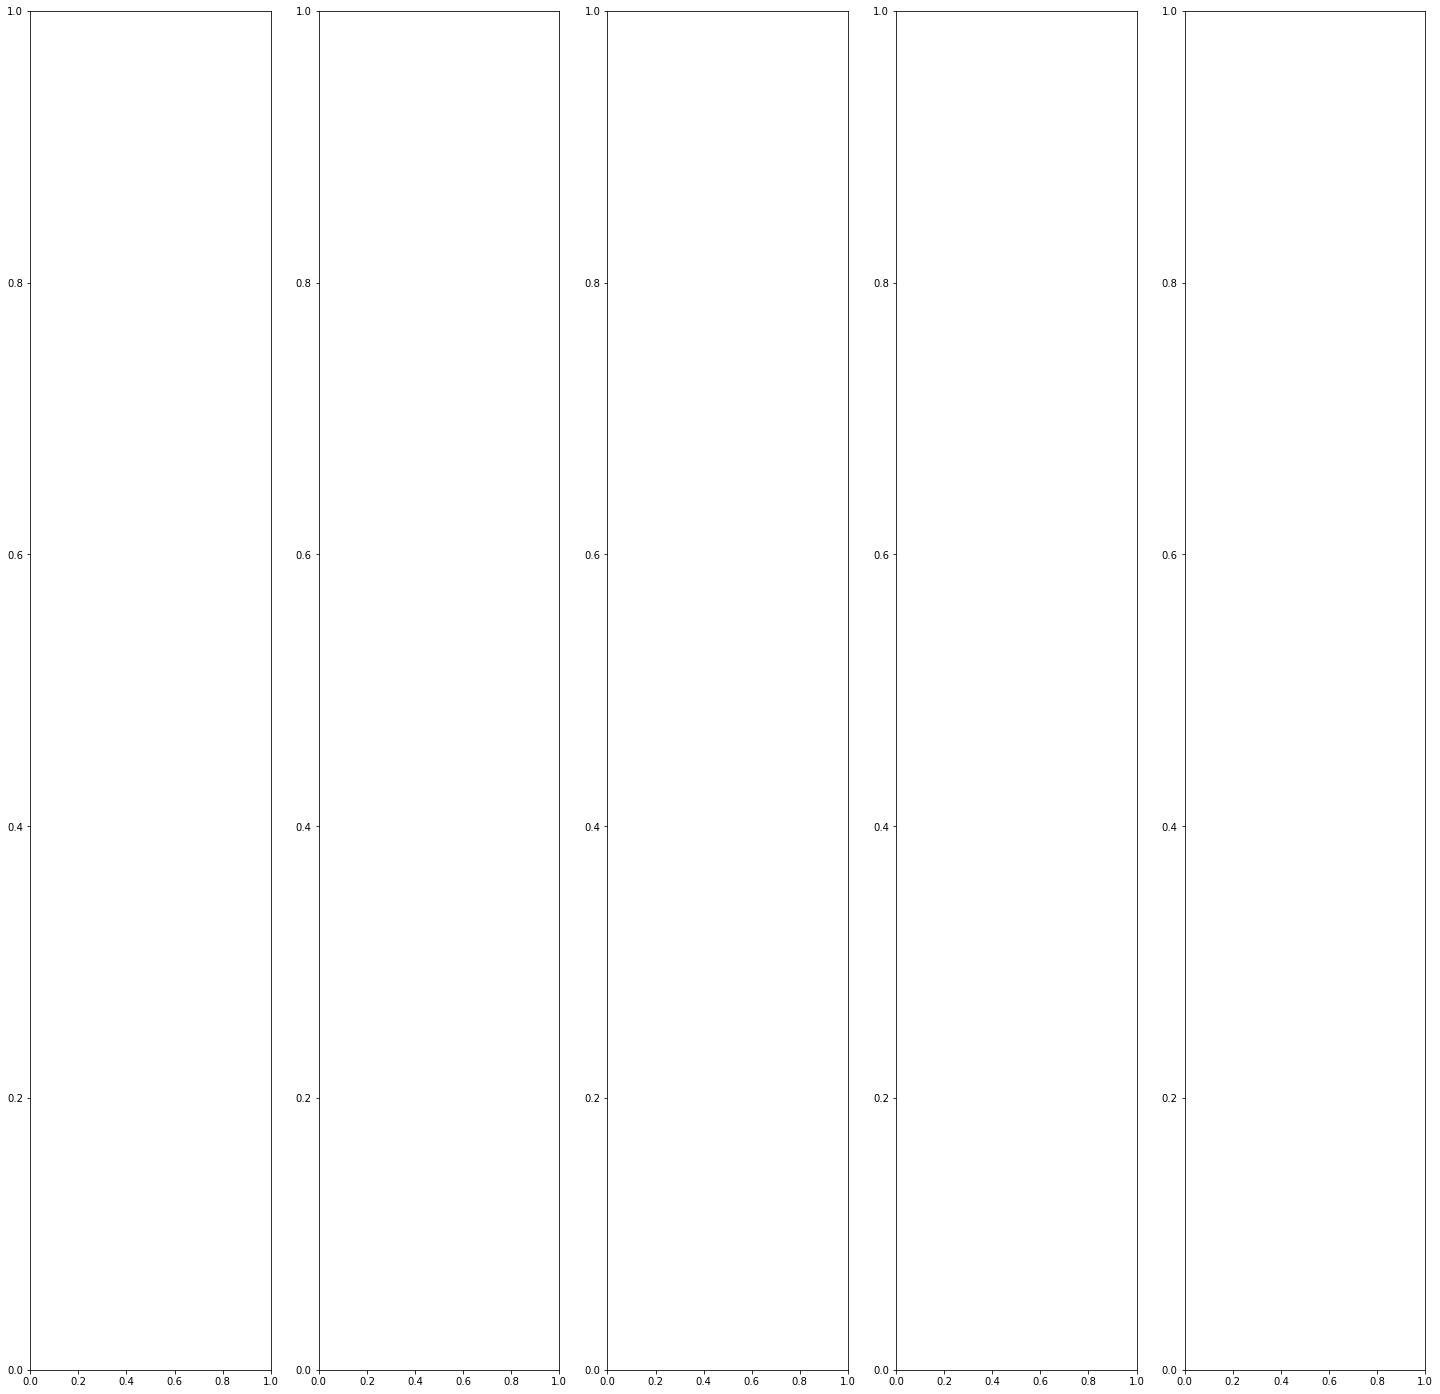

In [27]:
for name_diagnosis in df.columns[1:-1]:
    get_images(name_diagnosis)